## Πανεπιστήμιο Δυτικής Αττικής
## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής

### ΝΙΚΟ ΓΚΑΡΡΟ

<br>
<br>

# End-to-End Deep Learning για Αυτοκινούμενα Οχήματα


<br>
<br>
<br>
<br>

# Μελέτη δεδομένων

### Κλήση των απαραίτητων βιβλιόθηκων 

In [1]:
import pandas as pd
import cv2
import ntpath
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Dropout, Flatten, Dense, Cropping2D
from keras.preprocessing.image import ImageDataGenerator

## Εισαγωγή και μελέτη δεδομένων

In [2]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('C:/Users/NIKO/Documents/Zoom/driving_log.csv',names = columns)  

#### Αποκοπή ονόματος αρχείου από το path

In [3]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

#### Εμφάνιση των 5 πρώτων γραμμών δεδομένων 

In [4]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2022_01_18_23_05_38_936.jpg,left_2022_01_18_23_05_38_936.jpg,right_2022_01_18_23_05_38_936.jpg,0.0,0.0,0.0,0.000009
1,center_2022_01_18_23_05_39_015.jpg,left_2022_01_18_23_05_39_015.jpg,right_2022_01_18_23_05_39_015.jpg,0.0,0.0,0.0,0.000012
2,center_2022_01_18_23_05_39_093.jpg,left_2022_01_18_23_05_39_093.jpg,right_2022_01_18_23_05_39_093.jpg,0.0,0.0,0.0,0.000009
3,center_2022_01_18_23_05_39_173.jpg,left_2022_01_18_23_05_39_173.jpg,right_2022_01_18_23_05_39_173.jpg,0.0,0.0,0.0,0.000009
4,center_2022_01_18_23_05_39_263.jpg,left_2022_01_18_23_05_39_263.jpg,right_2022_01_18_23_05_39_263.jpg,0.0,0.0,0.0,0.000009


##### Εμφάνιση διαστάσεων πίνακα γραμμές=δείγματα,στήλες=χαρακτηριστικά

In [5]:
data.shape

(6400, 7)

In [6]:
print(data.iloc[971])

center      center_2022_01_18_23_06_57_833.jpg

left          left_2022_01_18_23_06_57_833.jpg

right        right_2022_01_18_23_06_57_833.jpg

steering                                   0.0

throttle                                   1.0

reverse                                    0.0

speed                                 30.19022

Name: 971, dtype: object


In [7]:
print(data.iloc[1].center)

center_2022_01_18_23_05_39_015.jpg


##### Εμφάνιση ονομάτος στηλών (χαρακτηριστικών)

In [8]:
data.columns

Index(['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'], dtype='object')

##### Εμφάνιση δεικτών, αρίθμηση δειγμάτων

In [9]:
data.index

RangeIndex(start=0, stop=6400, step=1)

<br>
<br>

# Γραφήματα με τη βιβλιοθήκη Matplotlib

H  Matplotlib είναι μια βιβλιοθήκη σχεδίασης 2D που παράγει γραφικά ποιότητας δημοσίευσης σε διάφορες μορφές.  Με λίγες γραμμές κώδικα δημιουργεί ιστογράμματα, γραφήματα ισχύος, ραβδογράμματα, γραφήματα διασποράς και άλλα 

<br>
<br>

### Ιστόγραμμα
Το
ύψος
της
κάθε
στήλης
σχεδιάζεται
με
τέτοιο
τρόπο
ώστε
εμβαδό
της
να
είναι
ίσο
με
την
συχνότητα
της
τιμής
στην
οποία
αναφέρεται

<AxesSubplot:>

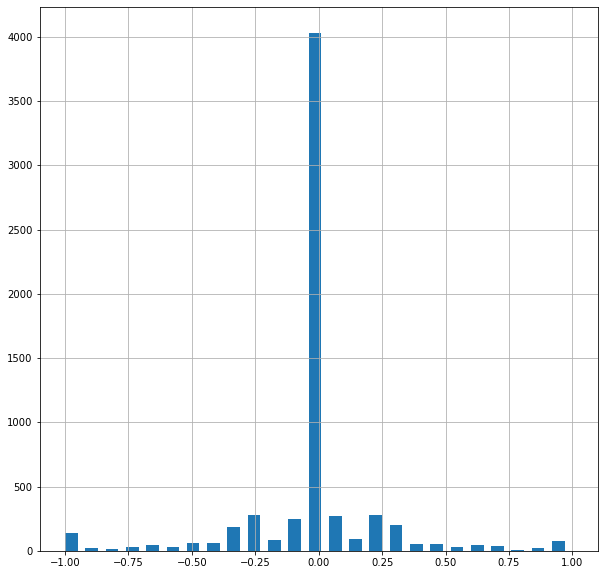

In [10]:
data['steering'].hist(bins=25,width=0.05, figsize=(10,10))

In [11]:
datadir='C:/Users/NIKO/Documents/Zoom/'

In [12]:
datadir

'C:/Users/NIKO/Documents/Zoom/'

#### Συνάρτηση προετοιμασίας των αρχείων εικόνας και των δεδομένων γωνίας τιμονιού

In [13]:
def load_img_steering (datadir,df):
    image_path=[] # path της εικόνας
    steering=[] #γωνία τιμονιού
    for i in range(len(data)):
        indexed=data.iloc[i]
        center,left,right=indexed[0],indexed[1],indexed[2]
        image_path.append(os.path.join(datadir,center.strip()))
        steering.append(float(indexed[3]))
    image_paths=np.asarray(image_path) 
    steerings=np.asarray(steering)
    return image_paths,steerings

### Ορισμός δεδομένων Εισόδου Χ, Εξόδου y

In [14]:
image_paths,steerings=load_img_steering(datadir + '/IMG',data)
X=image_paths
y=steerings

In [15]:
X.shape

(6400,)

In [17]:
X[1]

'C:/Users/NIKO/Documents/Zoom//IMG\\center_2022_01_18_23_05_39_015.jpg'

In [18]:
type(X)

numpy.ndarray

In [19]:
y.shape

(6400,)

In [20]:
type(y)

numpy.ndarray

### Διαχωρισμός σε δεδομένα εκπαίδευσης και δεδομένα ελέγχου

Χρησιμοποιούμε το εργαλείο της βιβλιοθήκης Scikit-learn ``train_test_split`` για να μοιράσουμε τα δεδομένα σε εκπαίδευσης και δεδομένα ελέγχου 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True,random_state=19)

In [22]:
print("X_train διαστάσεις:", X_train.shape)
print("y_train διαστάσεις:", y_train.shape)

print("X_test διαστάσεις:", X_test.shape)
print("y_test διαστάσεις:", y_test.shape)

X_train διαστάσεις: (4800,)

y_train διαστάσεις: (4800,)

X_test διαστάσεις: (1600,)

y_test διαστάσεις: (1600,)


In [23]:
a=1371
X_train[a]

'C:/Users/NIKO/Documents/Zoom//IMG\\center_2022_01_18_23_36_46_043.jpg'

In [24]:
y_train[a]

0.0

<br>
<br>

## Προεπεξεργασία εικόνας με OpenCV

### Δημιουργία συνάρτησης με όλα τα βήματα προεπεξεργασίας εικόνας

In [27]:
def proepexergasia_eikonas(eikona):
    eikona=cv2.imread(eikona) #δίαβασμα της είκονας 
    eikona=eikona[60:135,:,:] #αποκοπή αχρήστων για τον αλγόριθμο pixels όπως δέντρα και ουρανός
    eikona=cv2.cvtColor(eikona,cv2.COLOR_RGB2YUV) #αλλαγή του colorspace της εικόνας
    eikona=cv2.GaussianBlur(eikona,(5,5),0) #φιλτράρισμα της εικόνας με blur
    eikona=cv2.resize(eikona,(200,66)) #μεγένθυνση της είκονας στις διαστάσεις για το μοντέλο της nvidia
    eikona=eikona/255
    return eikona

#### Εφαρμογή συνάρτησης προεπεξεργασίας εικόνας στα δεδομένα

In [28]:
X_train=np.array(list(map(proepexergasia_eikonas,X_train)))
X_test=np.array(list(map(proepexergasia_eikonas,X_test)))

(4800, 66, 200, 3)

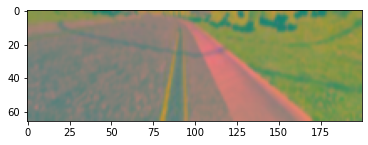

In [29]:
plt.imshow(X_train[8])
X_train.shape

<br>
<br>

## Προεπεξεργασία εικόνας με Keras

In [30]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

#### Επεξεργασία εικόνας κάνοντας περιστροφή,zoom,οριζόντια ανατροπή και μετακινόντας την οριζόντια και κατακόρυφα  

In [31]:
datagen = ImageDataGenerator(rotation_range=10, 
                             zoom_range=0.15,
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             horizontal_flip=True, 
                             fill_mode="nearest"
                             )

<br>
<br>
<br>

# Εκπαίδευση μοντέλου Παλινδρόμησης  με Νευρωνικά Δίκτυα

## Βήμα 1 - Επιλογή αρχιτεκτονικής μοντέλου
<br>


Ο τύπος μοντέλου που θα χρησιμοποιήσουμε είναι το ακολουθιακό  (**Sequential**). 
<br>
Το Sequential είναι ο ευκολότερος τρόπος για να σχεδιαστεί ένα μοντέλο στη βιβλιοθήκη Keras. 
<br>
<br>
Επιτρέπει τη **δημιουργία του μοντέλου σε επίπεδα (layers).**
<br>
<br>
Ένα **επίπεδο-Layer** είναι ένας απλός **μετασχηματισμός εισόδου-εξόδου** 
<br>
<br>
Χρησιμοποιούμε τη συνάρτηση **add()** για να προσθέσουμε επίπεδα στο μοντέλο μας. 
<br>
Το μοντέλο που χρησιμποποιήται είναι όμοιο με το μοντέλο που έγινε χρήση από την nvidia για την ανάπτυξει self-driving cars με CNN (convolutional neural networks) αρχιτεκτονική και αποτελείται από 9 επίπεδα, συμπεριλαμβανομένου ενός στρώματος κανονικοποίησης, 5 συνελικτικών επιπέδων και 3 πλήρως συνδεδεμένων επιπέδων.
Πηγή δεδομένων https://developer.nvidia.com/blog/deep-learning-self-driving-cars/ .
<br>

In [32]:
model = keras.Sequential()
     
model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
         
     
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dropout(0.4))
     
     
model.add(Dense(50, activation='elu'))
model.add(Dropout(0.4)) 

model.add(Dense(10, activation ='elu'))
model.add(Dense(1))

<br>

**Περίληψη της αρχιτεκτονικής του μοντέλου και αριθμός παραμέτρων**

In [33]:
model.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 31, 98, 24)        1824      

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     

_________________________________________________________________

conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     

_________________________________________________________________

conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     

_________________________________________________________________

flatten (Flatten)            (None, 1152)              0         

_________________________________________________________________

dense (Dense)                (None, 100)

## Βήμα 2 - Παραμετροποίση εκπαίδευσης
<br>
<br>
Προτού το μοντέλο είναι έτοιμο για εκπαίδευση, χρειάζεται μερικές ακόμη ρυθμίσεις. Αυτά προστίθενται κατά το βήμα **μεταγλώτισσης-compile** του μοντέλου:

**Συνάρτηση Απώλειας - Loss function** - μετρά πόσο ακριβές είναι το μοντέλο κατά τη διάρκεια της εκπαίδευσης και  χρησιμοποιείται για την εύρεση των «καλύτερων» τιμών παραμέτρων για το μοντέλο δηλαδή τα βάρη στο νευρωνικό δίκτυο. 
<br>
<br>
**Βελτιστοποιητής- Optimizer** - βρίσκει τις βέλτιστες τιμές των βαρών του Νευρωνικού δικτύου με βάση τα δεδομένα που βλέπει και ελαχιστοποιώντας τη Συνάρτηση Απώλειας.


In [34]:
model.compile(loss='mse', optimizer="adam")

<br>
<br>

## Βήμα 3 - Εκπαίδευση μοντέλου


H εκπαίδευση του μοντέλου γίνεται με τη μέθοδο **fit** 

In [35]:
history=model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_test,y_test),
                    steps_per_epoch=len(X_train)/32, epochs=30,
                    verbose=1,
                    shuffle=1)


Instructions for updating:

Please use Model.fit, which supports generators.

Epoch 1/30

150/150 [==============================] - ETA: 0s - loss: 0.131 - 199s 1s/step - loss: 0.1314 - val_loss: 0.0738

Epoch 2/30

150/150 [==============================] - 51s 339ms/step - loss: 0.0781 - val_loss: 0.0736

Epoch 3/30

150/150 [==============================] - 46s 310ms/step - loss: 0.0774 - val_loss: 0.0728

Epoch 4/30

150/150 [==============================] - 45s 303ms/step - loss: 0.0766 - val_loss: 0.0707

Epoch 5/30

150/150 [==============================] - 61s 408ms/step - loss: 0.0756 - val_loss: 0.0714

Epoch 6/30

150/150 [==============================] - 49s 327ms/step - loss: 0.0751 - val_loss: 0.0731

Epoch 7/30

150/150 [==============================] - 51s 337ms/step - loss: 0.0749 - val_loss: 0.0709

Epoch 8/30

150/150 [==============================] - 46s 309ms/step - loss: 0.0747 - val_loss: 0.0697

Epoch 9/30

150/150 [==============================] - 46s 

## Βήμα 4 - Αξιολόγηση επίδοσης μοντέλου

Text(0.5, 0, 'Epoch')

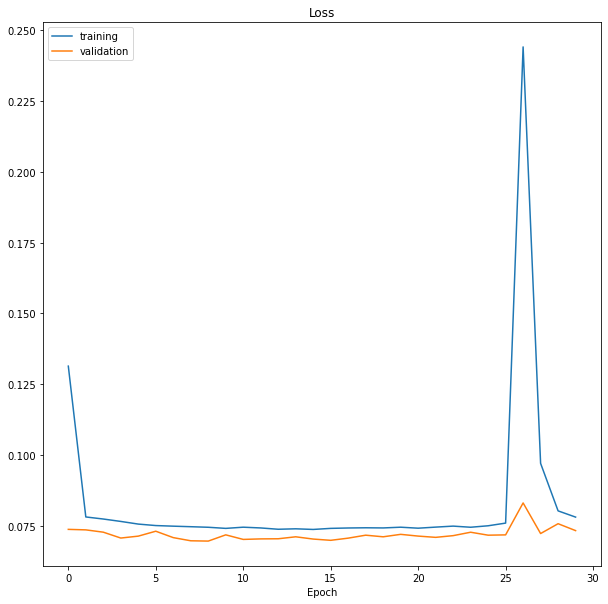

In [36]:
fig=plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

## Αποθήκευση εκπαιδευμένου μοντέλου

In [37]:
model.save('modelAuto.h5')

#### Συμπεράσματα

Αρχικά κάνουμε load το αρχείο csv που δημιουργήσαμε με τον simulator έπειτα κόβουμε το pathing του αρχείου ώστε να μπορούμε να το επεξεργαστούμε πιο εύκολα και αναθέτουμε τις  μεταβλητές εισόδου και εξόδου  X, y αντοίστιχα, με τις οποίες θα μοιράσουμε τα δεδομένα σε εκπαίδευσης και δεδομένα ελέγχου.Μετέπειτα, κάνουμε προεπεξεργασία εικόνας με OpenCV δηλαδή φτίαχνουμε μια συνάρτηση την **proepexergasia_eikonas** η οποία αρχικά διαβάζει την εικόνα, αφού έχουμε αποθηκεύμενο μόνο το pathing της, κόβει (crop) το μη χρήσιμο για το μοντέλο εκπαίδευσης κομμάτι της δηλαδη τα δέντρα,τον ουρανό και το hood του αυτοκινήτου ,αλλάζει του colorspace της εικόνας, φιλτράρει την εικόνα με blur και τέλος την μεγένθυνη στις διαστάσεις για το μοντέλο της nvidia.Με το map εφαρμόζουμε την συνάρτηση προεπεξεργασίας εικόνας **proepexergasia_eikonas** στα δεδομένα.Έπειτα κάνουμε προεπεξεργασία εικόνας Keras με την βοήθεια της συνάρτησης **datagen = ImageDataGenerator(..)** η οποία αρχικά κάνει τυχαίες περιστροφές κατά 10 μοίρες στις εικόνες, τυχαία zoom στις εικόνες, τις μετακινεί οριζόντια και κατακόρυφα , κάνει τυχαίες οριζόντιες ανατροπές και τέλος τα σημεία εκτός των ορίων της εισόδου συμπληρώνονται σύμφωνα με τη πιο κοντινή τιμή π.χ aaaaaaaa|abcd|dddddddd. Η επιλογή της αρχιτεκτονικής του μοντέλου έγινε σύμφωνα με το μοντέλο που ανάπτυξε η nvidia για τα δικά της self-driving cars.Δηλαδή, χρησιμοποιήται μοντέλο με **CNN (convolutional neural networks)** αρχιτεκτονική και αποτελείται από 9 επίπεδα, συμπεριλαμβανομένου ενός στρώματος κανονικοποίησης, 5 συνελικτικών επιπέδων και 3 πλήρως συνδεδεμένων επιπέδων. Πηγή δεδομένων https://developer.nvidia.com/blog/deep-learning-self-driving-cars/ .Έπειτα, κάνουμε περίληψη της αρχιτεκτονικής του μοντέλου και των αριθμών των παραμέτρων. Προσθέτουμε ρυθμίσεις που πραγματοποιούνται κατά το compile του μοντέλου, δηλαδή μια συνάρτηση απώλειας - Loss function που μετρά πόσο ακριβές είναι το μοντέλο κατά τη διάρκεια της εκπαίδευσης και χρησιμοποιείται για την εύρεση των «καλύτερων» τιμών παραμέτρων για το μοντέλο δηλαδή τα βάρη στο νευρωνικό δίκτυο, συγκεκριμένα το μέσο τετράγωνο σφάλμα ή απώλεια mse είναι η προεπιλεγμένη απώλεια που χρησιμοποιείται για προβλήματα παλινδρόμησης και είναι η προτιμώμενη συνάρτηση απώλειας στο πλαίσιο συμπερασμάτων της μέγιστης πιθανότητας εάν η κατανομή της μεταβλητής στόχου (steering) είναι Gaussian. Είναι μια συνάρτηση απώλειας που πρέπει να αξιολογηθεί πρώτα και αλλάζει μόνο εάν έχει καλό λόγο και ένα βελτιστοποιητής- Optimizer που βρίσκει τις βέλτιστες τιμές των βαρών του Νευρωνικού δικτύου με βάση τα δεδομένα που βλέπει και ελαχιστοποιώντας τη Συνάρτηση Απώλειας συγκεκριμένα γίνεται χρήση του Adam και είναι ένας αλγόριθμος βελτιστοποίησης που μπορεί να χρησιμοποιηθεί αντί της κλασικής διαδικασίας stochastic gradient descent.Τελικά κάνουμε την εκπαίδευση του μοντέλου με τη μέθοδο fit(), το οποίο θα εκπαιδεύσει το μοντέλο τεμαχίζοντας τα δεδομένα σε "batches" μεγέθους batch_size και επαναλαμβανόμενα επανειλημμένα σε ολόκληρο το σύνολο δεδομένων για έναν δεδομένο αριθμό epochs, το datagen.flow() κάνει  real-time augmentation των δεδομένων. Αξιολογούμε το μοντέλο κάνοντας γραφική αναπαράσταση του training loss values και των  validation loss values (το loss των δεδομένων αξιολόγησης της, validation_data,του μοντέλου στο τέλος κάθε epoch) ανά κάθε epoch.  